# Build a KNN Classifier on MNIST train and test dataset having digits (0-9)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Mtrain = pd.read_csv('/content/drive/MyDrive/111 ITC Colab Datasets/MNIST_train.csv')

In [3]:
Mtest = pd.read_csv('/content/drive/MyDrive/111 ITC Colab Datasets/MNIST_test.csv')

In [4]:
## MNIST Train data of 60000 x 787 with labels column = target y
## 0-783 columns representing the label X as an image of 28x28 pixels

Mtrain.head()

,Unnamed: 0,index,labels,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
0,0,0,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,3,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,4,9,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
Mtrain_df = Mtrain.sample(frac = 0.7)

In [6]:
## MNIST Test data of 10000 x 787 with labels column = target y
## 0-783 columns representing the label X as an image of 28x28 pixels
Mtest.head()

,Unnamed: 0,index,labels,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
0,0,0,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,4,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
## Extract Train data and labels

In [8]:
Xtrain = Mtrain_df.to_numpy()

In [9]:
ytrain = Xtrain[:, 2]

In [10]:
ytrain

array([6, 4, 2, ..., 1, 8, 5])

In [11]:
Xtrain = Xtrain[:, 3:]

In [12]:
Xtrain.shape

(42000, 784)

In [13]:
## Extract Test data and labels

In [14]:
Mtest_df = Mtest.sample(frac = 0.7)

In [15]:
Xtest = Mtest.to_numpy()

In [16]:
ytest = Xtest[:, 2]

In [17]:
ytest

array([7, 2, 1, ..., 4, 5, 6])

In [18]:
Xtest = Xtest[:, 3:]

In [19]:
Xtest.shape

(10000, 784)

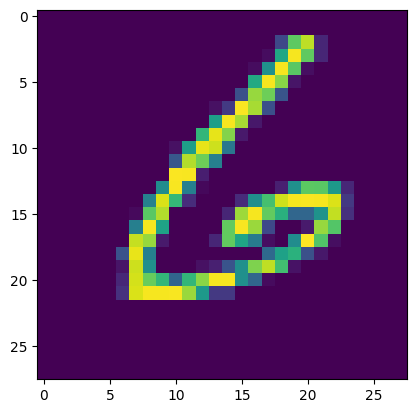

In [20]:
# MNIST train dataset Image data at index 0

plt.imshow(Xtrain[0].reshape(28,28))

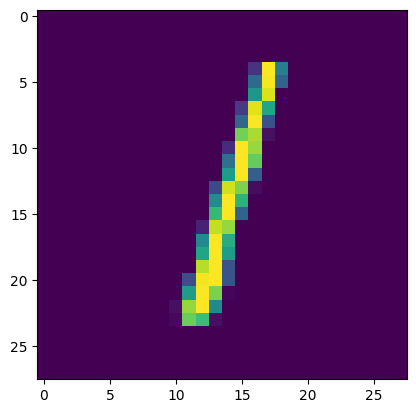

In [21]:
# MNIST test dataset Image data at index 2

plt.imshow(Xtest[2].reshape(28,28))

In [22]:
# Normalising the column data with values ranging from 0-255 using Min-max scaling method

def Data_Scaler(Xdata):
  Xmin = np.min(Xdata)
  Xmax = np.max(Xdata)
  Xscaled = Xdata.astype('float')

  N, D = Xdata.shape

  for i in range(0, N):
    for j in range(0, D):
      Xscaled[i,j] = float((Xdata[i,j] - Xmin) / (Xmax - Xmin))

  return Xscaled

In [23]:
Xscaled_train = Data_Scaler(Xtrain)

In [24]:
ytrain[0], Xscaled_train[0,:]

(6,
 array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 

In [25]:
Xscaled_test = Data_Scaler(Xtest)

In [26]:
ytest[0], Xscaled_test[0,:].reshape(28,28)

(7,
 array([[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
       

In [27]:
# KNN Measures distance between 2 points called euclidean distance

class KNNClassifier():

  def fit(self, X, y):
    self.X = X
    self.y = y

  def predict(self, X, K, epsilon = 1e-3):    # K is number of neighbours
    N = len(X)                                # Total no of observations
    y_hat = np.zeros(N)                       # array of predictions of size N

    #get distances , loop through every point
    for i in range(N):
      dist_square = np.sum((self.X-X[i])**2, axis = 1)

      # Get the indexes of 5 lowest values of distances (idxt is index of nearest point)
      idxt = np.argsort(dist_square)[:K]
      gamma_k = 1 / (np.sqrt(dist_square[idxt] + epsilon))

      ##classes of nearest neighbours, gamma weights (inverse of distances)
      # bincount returns array of  weighted sum for each class
      y_hat[i] = np.bincount(self.y[idxt], weights= gamma_k).argmax()

    return y_hat

In [28]:
def accuracy(y,y_hat):
  return np.mean(y==y_hat)

In [29]:
knn = KNNClassifier()

In [30]:
knn.fit(Xscaled_train,ytrain)

In [31]:
ytrain_hat = knn.predict(Xscaled_train, 5)

In [32]:
accuracy(ytrain, ytrain_hat)

1.0

Text(0.5, 47.7222222222222, 'Predicted label')

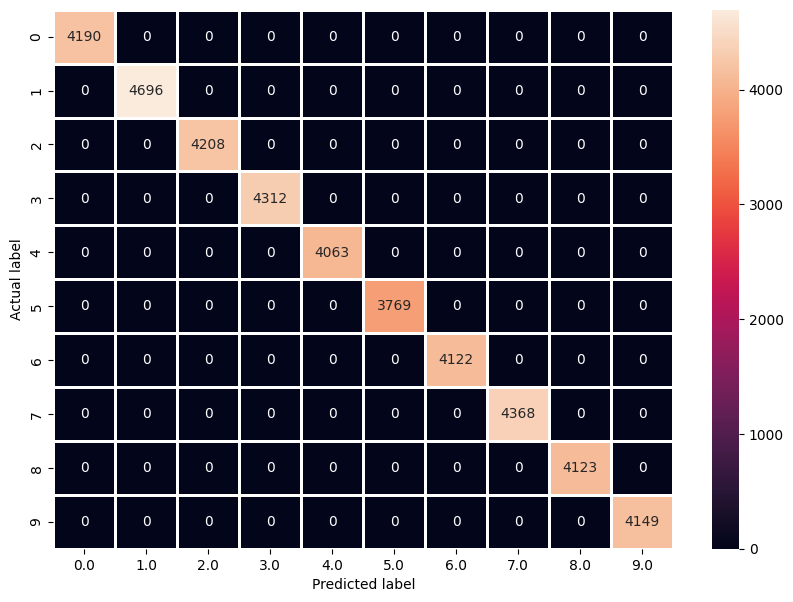

In [33]:
## confusion matrix

plt.figure(figsize=(10,7))
y_actu = pd.Series(ytrain, name='Actual')
y_pred = pd.Series(ytrain_hat, name='Predicted')
cm = pd.crosstab(y_actu, y_pred)
ax = sns.heatmap(cm, linewidths = 2, annot=True, fmt="d")
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [34]:
ytest_hat = knn.predict(Xscaled_test, 5)

In [ ]:
accuracy(ytest, ytest_hat)

Text(0.5, 47.7222222222222, 'Predicted label')

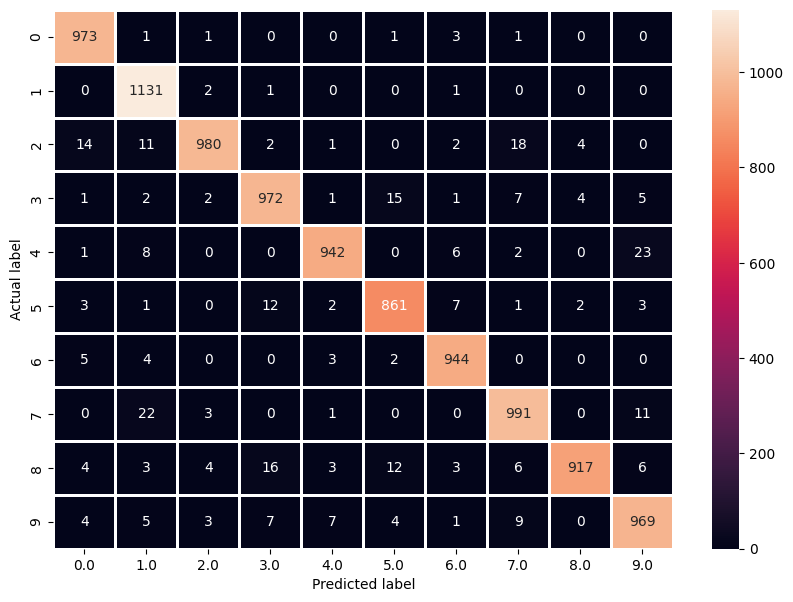

In [36]:
## confusion matrix

plt.figure(figsize=(10,7))
y_actu = pd.Series(ytest, name='Actual')
y_pred = pd.Series(ytest_hat, name='Predicted')
cm = pd.crosstab(y_actu, y_pred)
ax = sns.heatmap(cm, linewidths = 2, annot=True, fmt="d")
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [37]:
(973+1131+980+972+942+861+944+991+917+969)/(973+1131+980+972+942+861+944+991+917+969+9+1+4+7+7+3+5+4+6+6+3+12+3+16+4+3+4+11+1+3+22+5+4+3+2+3+2+1+7+2+12+1+3+1+8+6+2+23+5+4+7+1+15+1+2+2+1+14+11+2+1+2+18+4+1+1+2+1+3+1+1+1)

0.968